In [0]:
from matplotlib import pyplot
from scipy.misc import toimage

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras
import tensorflow as tf

from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3262153002689643772
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10189261413448555460
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7887455396354573514
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9672527053
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6598998217962578434
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
def show_image_grid(X):
    pyplot.figure(1)
    k = 0
    for i in range(0, 5):
        for j in range(0, 5):
            pyplot.subplot2grid((5,5),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k + 1
    pyplot.show()

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
cats = [X_train[i] for i in range(0, len(X_train)) if y_train[i] == 3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


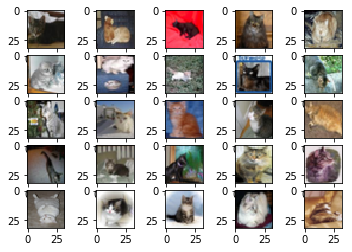

In [0]:
show_image_grid(cats)

In [0]:
num_classes=10

In [0]:
X_train.shape[1:]

(32, 32, 3)

In [0]:
from keras import regularizers

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(1024, activation="tanh"))
model.add(Dense(1024, activation="tanh"))
model.add(Dense(1024, activation="tanh"))
model.add(Dense(512, activation="tanh"))
model.add(Dense(256, activation="tanh"))
model.add(Dense(128, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
sgd = keras.optimizers.SGD(lr=0.01,
                           decay=1e-6,
                           momentum=0.9,
                           nesterov=True)
rmsprop = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_val = X_train[0:5000,:]
y_val = y_train[0:5000,:]
X_train = X_train[5000:50000,:]
y_train = y_train[5000:50000,:]

In [0]:
X_val.shape

(5000, 32, 32, 3)

In [0]:
hist = model.fit(X_train,
          y_train,
          batch_size=32,
          epochs=15,
          validation_data=(X_val, y_val),
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 276s 6ms/step - loss: 1.6462 - acc: 0.4033 - val_loss: 1.3660 - val_acc: 0.5136
Epoch 2/15
45000/45000 [==============================] - 277s 6ms/step - loss: 1.2691 - acc: 0.5505 - val_loss: 1.4279 - val_acc: 0.4958
Epoch 3/15
45000/45000 [==============================] - 271s 6ms/step - loss: 1.0559 - acc: 0.6317 - val_loss: 1.0536 - val_acc: 0.6378
Epoch 4/15
45000/45000 [==============================] - 245s 5ms/step - loss: 0.8918 - acc: 0.6959 - val_loss: 0.9878 - val_acc: 0.6538
Epoch 5/15
45000/45000 [==============================] - 220s 5ms/step - loss: 0.7487 - acc: 0.7469 - val_loss: 0.9302 - val_acc: 0.6794
Epoch 6/15
45000/45000 [==============================] - 221s 5ms/step - loss: 0.6209 - acc: 0.7932 - val_loss: 1.0296 - val_acc: 0.6808
Epoch 7/15
45000/45000 [==============================] - 221s 5ms/step - l

In [0]:
scores = model.evaluate(X_test,
                        y_test,
                        verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 14s 1ms/step
Test loss: 1.3486480641126632
Test accuracy: 0.6796


In [0]:
scores

[1.3881856770515442, 0.6811]

In [0]:
predicted = model.predict(X_test)

In [0]:
import numpy as np

In [0]:
predicted

array([[2.92456651e-04, 5.55474689e-05, 2.33919569e-03, ...,
        6.44790416e-05, 4.21471224e-04, 1.02367856e-04],
       [4.13568894e-04, 1.70516428e-02, 6.16148522e-04, ...,
        4.96147804e-05, 9.80663598e-01, 5.78621461e-04],
       [2.41207257e-01, 1.10487770e-02, 6.68575289e-04, ...,
        9.10905772e-04, 7.31956482e-01, 1.11404741e-02],
       ...,
       [1.28628773e-04, 2.38837223e-04, 2.55698040e-02, ...,
        1.71073303e-01, 3.17838712e-04, 1.01927342e-03],
       [3.26389656e-03, 9.90322053e-01, 8.26351425e-06, ...,
        2.23139083e-04, 3.82735627e-04, 2.46376428e-03],
       [8.52799276e-05, 1.09145447e-04, 2.66731775e-04, ...,
        9.98180389e-01, 4.40411641e-05, 1.83057229e-04]], dtype=float32)

In [0]:
predicted[0]

array([2.92456651e-04, 5.55474689e-05, 2.33919569e-03, 9.87465441e-01,
       1.44228130e-03, 3.10801575e-03, 4.70873062e-03, 6.44790416e-05,
       4.21471224e-04, 1.02367856e-04], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


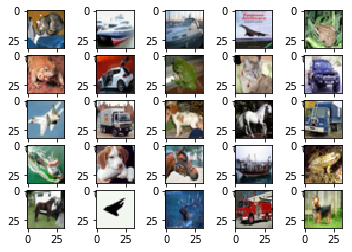

In [0]:
show_image_grid(X_test[0:25,:])

In [0]:
X_test[0].shape

(32, 32, 3)

In [0]:
hist

In [0]:
hist.history

{'acc': [0.4050888888888889,
  0.5563555555555556,
  0.6427555555555555,
  0.7060222222222222,
  0.7542444444444445,
  0.8028888888888889,
  0.8401555555555555,
  0.8758,
  0.8946666666666667,
  0.913,
  0.9288222222222222,
  0.9376444444444444,
  0.9446888888888889,
  0.9523777777777778,
  0.9566444444444444],
 'loss': [1.6422159837934707,
  1.2484057464387681,
  1.032075866985321,
  0.8689637530856662,
  0.7243379397975074,
  0.5931758483568828,
  0.4885944678942363,
  0.39092344596650863,
  0.331574265382025,
  0.2764074565741751,
  0.22997313298549918,
  0.20084957359830538,
  0.18166994724108113,
  0.15582458302378654,
  0.13787262034018835],
 'val_acc': [0.4822,
  0.59,
  0.6402,
  0.6568,
  0.6872,
  0.6808,
  0.6744,
  0.6894,
  0.678,
  0.6882,
  0.674,
  0.6696,
  0.6886,
  0.6878,
  0.6824],
 'val_loss': [1.4494565326690674,
  1.1805069854736328,
  1.063178792476654,
  1.0284368556022645,
  0.9559417303085327,
  1.0157827978134155,
  1.0495736651420593,
  1.020846177482605,


In [0]:
model2 = Sequential()
model2.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (2, 2), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (2, 2), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (2, 2), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (2, 2), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))


model2.add(Flatten())
model2.add(Dense(512, activation="relu"))
model2.add(Dense(512, activation="relu"))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.4,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

datagen.fit(X_train)

res =model2.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=(len(X_train) // 32),
                    epochs=150,
                    validation_data=(X_val, y_val))

In [0]:
scores2 = model2.evaluate(X_test,
                        y_test,
                        verbose=1)
print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])

10000/10000 [==============================] - 8s 801us/step
Test loss: 0.7357595001220704
Test accuracy: 0.7831
